In [ ]:
#We are exploring 3 data sets below: App Data, TV Data, & Web Data. 

#Each set comes from a panel of participants who have an app installed on their mobile device. The app 
#simultaneously tracks their website usage, app usage, and tv watching behavior. To track TV behavios, the app 
#listens and is able to ID all TV shows if a participant is watching TV. 

#Most columns are self-explanatory. The app and website data contain a device ID column since each user may have 
#several devices. Some of the columns in the TV file may be unfamiliar to you. Below is a brief description of 
#these columns:

#TIMESHIFT_INDICATOR_DESC
    #• Live – indicates the television program was watched on live television.
    #• Same day – indicates the television program was not watched live, but was watch
    #the same day it was aired live on television, typically on DVR or some sort of
    #streaming device.
    #• X day – indicates the television program was not watched live, but was watched X
    #days later, typically on DVR or some sort of streaming device.
    #• On demand – indicates the television program was watched on demand.
    #VIDEO_VIEW_PLATFORM
    #• OTT – typically streaming platforms such as Hulu, Roku, etc.
    #• DVR – DVR
    #• VOD – Video on Demand
    #• Live – indicates the television program was watched on live television.
    
#ELAPSED_TIME – Total milliseconds that the individual watched the television program.

#SAM_CHANNEL_NAME – Sanitized network identifiers (each unique identifier maps to a unique linear network).

In [3]:
#IMPORT PACKAGES USED
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import re
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashleyansley/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
#########################APP DATA ANALYSIS###########################

#READ/LOAD DATA

app_data = pd.read_csv('/Users/ashleyansley/app_data.csv')
#Data Description: Tracks App Type Usage and Duration at different times of the day by User.
#COMMON_CATEGORY_DESC is simply the "type" of app being used. 
#GROUP_TITLE_DESC is the title/name of the app.
#HOUR_PART_DESC will be the time frame the app is used. Will remain categorical.

In [90]:
#DATA EXPLORATION

#Review Data types
app_data.dtypes

TIME_DIM_ID               int64
USERS_META_ID             int64
DEVICE_DIM_ID             int64
OS_DIM_ID                 int64
HOUR_PART_DESC           object
GROUP_TITLE_DESC         object
COMMON_CATEGORY_DESC     object
TOTAL_MINUTES           float64
dtype: object

In [91]:
#CONVERT DATA TYPES TO CATEGORICAL
app_data['HOUR_PART_DESC'] = app_data['HOUR_PART_DESC'].astype("category")
app_data['GROUP_TITLE_DESC'] = app_data['GROUP_TITLE_DESC'].astype("category")
app_data['COMMON_CATEGORY_DESC'] = app_data['COMMON_CATEGORY_DESC'].astype("category")
app_data.dtypes

TIME_DIM_ID                int64
USERS_META_ID              int64
DEVICE_DIM_ID              int64
OS_DIM_ID                  int64
HOUR_PART_DESC          category
GROUP_TITLE_DESC        category
COMMON_CATEGORY_DESC    category
TOTAL_MINUTES            float64
dtype: object

In [92]:
#Display how many columns and rows.  
app_data.shape
#797,563 records and 8 columns. 

(797563, 8)

In [93]:
#CHECK FOR NULL VALUES BY COLUMN
app_data.isnull().sum()

TIME_DIM_ID             0
USERS_META_ID           0
DEVICE_DIM_ID           0
OS_DIM_ID               0
HOUR_PART_DESC          0
GROUP_TITLE_DESC        0
COMMON_CATEGORY_DESC    0
TOTAL_MINUTES           0
dtype: int64

In [94]:
#No nulls. We are good to move forward. Will not be eliminating any columns–no need. 

In [95]:
#Let's get a description of the data. 
app_data.describe()

,TIME_DIM_ID,USERS_META_ID,DEVICE_DIM_ID,OS_DIM_ID,TOTAL_MINUTES
count,797563.0,7.975630e+05,797563.000000,797563.0,797563.000000
mean,20170102.0,1.979783e+06,295870.809907,1.0,3.045529
std,0.0,6.778059e+05,38821.942630,0.0,5.268006
min,20170102.0,4.310000e+02,2423.000000,1.0,0.000000
25%,20170102.0,1.986228e+06,285202.000000,1.0,0.500000
50%,20170102.0,2.317421e+06,308166.000000,1.0,1.000000
75%,20170102.0,2.361508e+06,322313.000000,1.0,3.000000
max,20170102.0,2.373474e+06,332140.000000,1.0,30.000000


In [96]:
#Insight: People on average stay on an app for 3 minutes. 

<AxesSubplot:ylabel='COMMON_CATEGORY_DESC'>

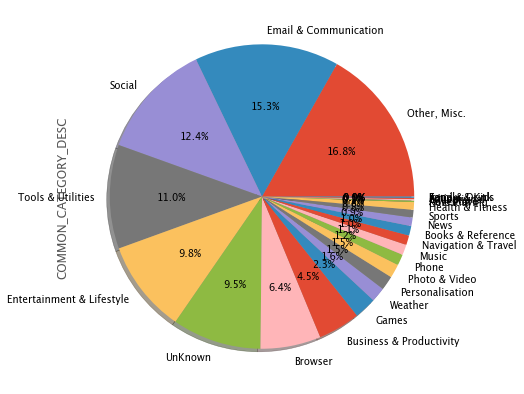

In [97]:
#ANALYSIS 1: WHAT TYPE OF APPS DO PEOPLE USE MOST? 
plt.figure(figsize=(14,7))
app_data["COMMON_CATEGORY_DESC"].value_counts().plot(kind="pie",shadow=True,autopct = '%1.1f%%')

In [98]:
#Insight: As expected, people tend to use email, socail and Other/Misc. apps most. 

Text(0.5, 1.0, 'Top 5 Apps Used')

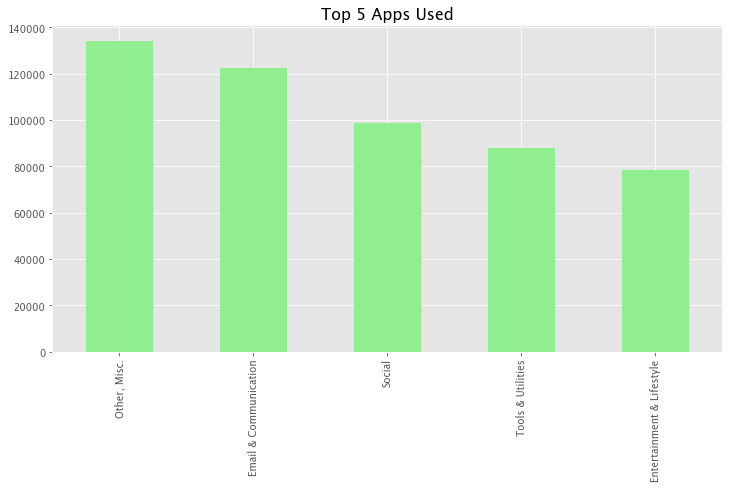

In [99]:
#ANALYSIS 2: WHICH CATEGORIES HAVE LONGER ENGAGEMENT and MORE POPULAR?
#Let's display top 5 with by engagement and then compare to apps used more 
#than 5 minutes. 
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
app_data[app_data["TOTAL_MINUTES"]>=0]["COMMON_CATEGORY_DESC"].value_counts()[:5].plot(kind="bar",color="lightgreen")
plt.title("Top 5 Apps Used",size=16)

In [100]:
#Insight: Email, Other and Social are apps typically used more.

Text(0.5, 1.0, 'Top 5 Apps Used')

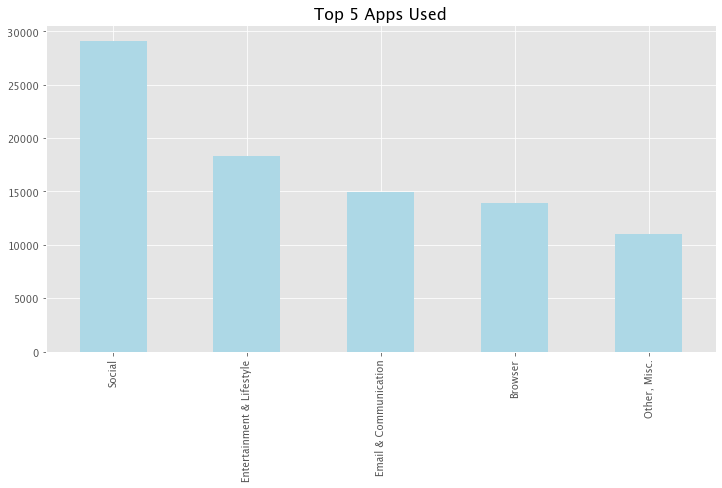

In [101]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
app_data[app_data["TOTAL_MINUTES"]>=5]["COMMON_CATEGORY_DESC"].value_counts()[:5].plot(kind="bar",color="lightblue")
plt.title("Top 5 Apps Used",size=16)

In [102]:
#Insight: We can now see that when on an app more than 5 minutes, the user is likely on a social media app. It then
#goes down to entertainment/lifestyle and email, similar. 

In [103]:
#ANALYSIS 3: WHAT ARE THE TOP 10 USED APPS? 
app_data[(app_data["TOTAL_MINUTES"]>=0.01)]["GROUP_TITLE_DESC"].sample(10)

109165     Slidejoy - Earn Cash! (Beta)
250088     Samsung Internet For Android
601575                   Htc Sense Home
679087                            Gmail
92792                        Weatherbug
71618                          Launcher
762621                         Incallui
441137       Kplc 7 Stormvision Weather
123614    Amazon Mshop Android Shopping
267591                         Launcher
Name: GROUP_TITLE_DESC, dtype: category
Categories (11165, object): ['"Magnetic Balls" Puzzle Game', '#1 Herpes, Std, Hiv Dating', '(Free) Go Sms Feelings Theme', '(Free) Go Sms Pure Gold Theme', ..., '√ê√±√∞√∞√∞? √ë√∞¬∫√∞√∞¬∑√∞¬∫√∞ √ê √ë√∞¬ø√ê¬µ√..., '√ê√∞?√ê√∞√∞¬ª√ë√∞?√ë√∞¬π √ê√∞√∞?√ê¬∫ R-Connect', '√ê√∞¬ª√ê√∞¬≤√ê?√ë√∞¬µ √ê?√ê?√ê¬≤√ê?√ë√±√∞ √ê√..., '√ò¬µ√π√∏¬ß√ò¬™√π Salatuk (Prayer Time)']

In [104]:
#Insight: Appears that of the top are as expected: News, mail, weather, calculator, google search, etc. 
#The Incallui is a #system app that runs in the background and is used as call service. This is expected to have 
#many instances.

Text(0.5, 1.0, 'Frequency of Times Apps are Used')

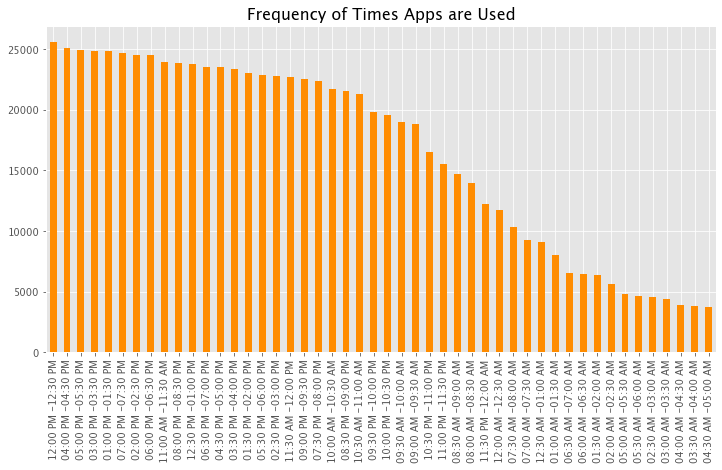

In [105]:
#ANALYSIS 4: WHICH TIMES OF DAY HAVE MORE TRAFFIC?
#Let's do a frequency graph ranking by highest engagement by time
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
app_data[app_data["TOTAL_MINUTES"]>.01]["HOUR_PART_DESC"].value_counts()[:48].plot(kind="bar",color="darkorange")
plt.title("Frequency of Times Apps are Used" ,size=16)

In [106]:
#Insight: It appears that people are most engaged during lunch hours and afternoon,further going into evening times
#with some late morning. As expected, people are least engaged between about 12:30 and 7:30am. This is a good time 
#to roll out advertisements, updates, and prepare content for peak hours.

Text(0.5, 1.0, 'Most frequent times for Social Media')

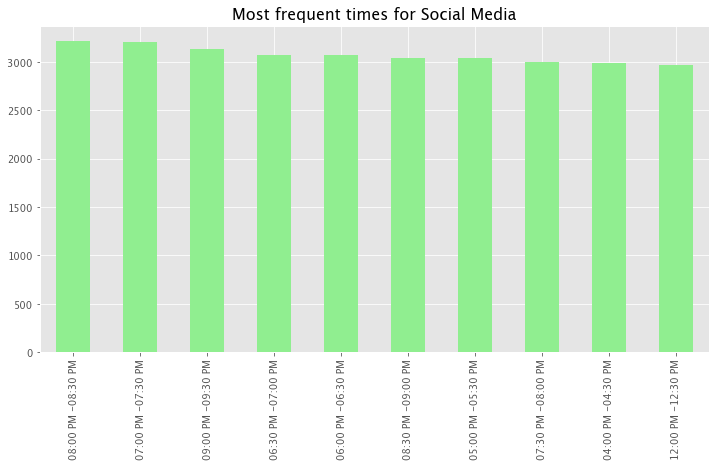

In [107]:
#ANALYSIS 5: DOES TIME OF DAY HAVE EFFECT ON WHICH CATEGORIES MORE POPULAR?
#i.e. email... Since we know the most popular apps used are Email and Social Media, we can see which times are most popular for each of those. This can tell us the most 
#popular times a day. 

#Social Medial
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
app_data[app_data["COMMON_CATEGORY_DESC"]=="Social"]["HOUR_PART_DESC"].value_counts()[:10].plot(kind="bar",color="lightgreen")
plt.title("Most frequent times for Social Media",size=16)

Text(0.5, 1.0, 'Most frequent times Emails are checked')

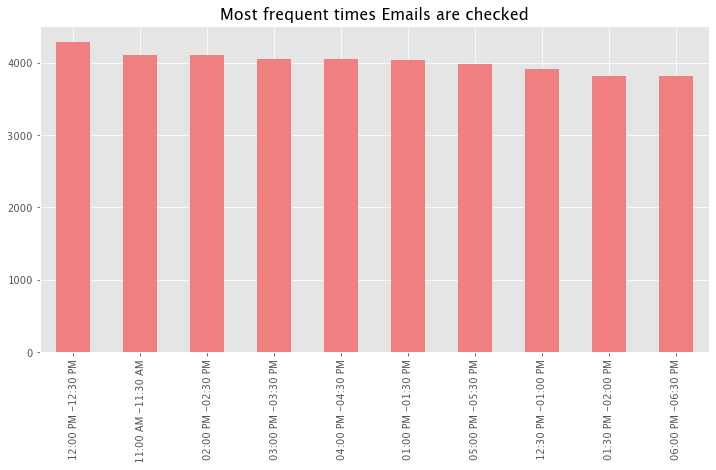

In [108]:
#Emails
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
app_data[app_data["COMMON_CATEGORY_DESC"]=="Email & Communication"]["HOUR_PART_DESC"].value_counts()[:10].plot(kind="bar",color="lightcoral")
plt.title("Most frequent times Emails are checked",size=16)

In [109]:
#Insight: The most frequent time email/communication apps are used is during lunch hours throughout the early and late 
#afternoon. 11am was the earliest AM timeframe where people are using email apps most. On the contrary, social media
#apps appear to be used more often in the evening and night time. This can be crucial for certain algorithms on 
#social media apps, advertisements, etc.

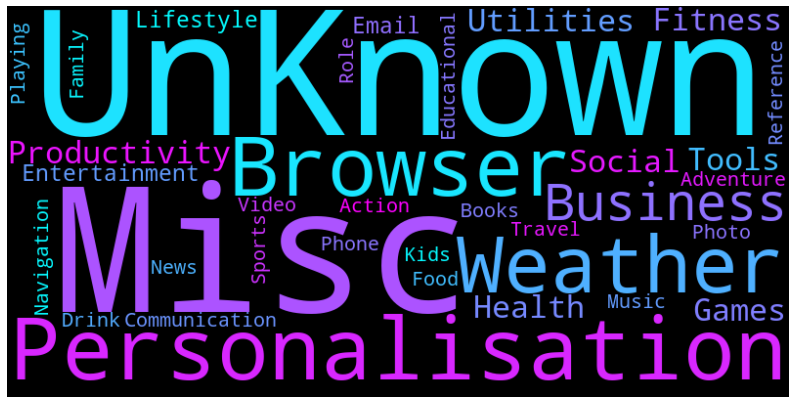

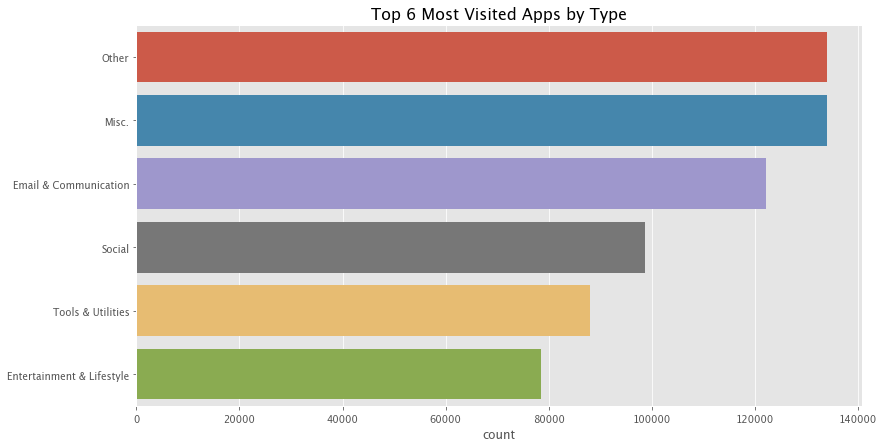

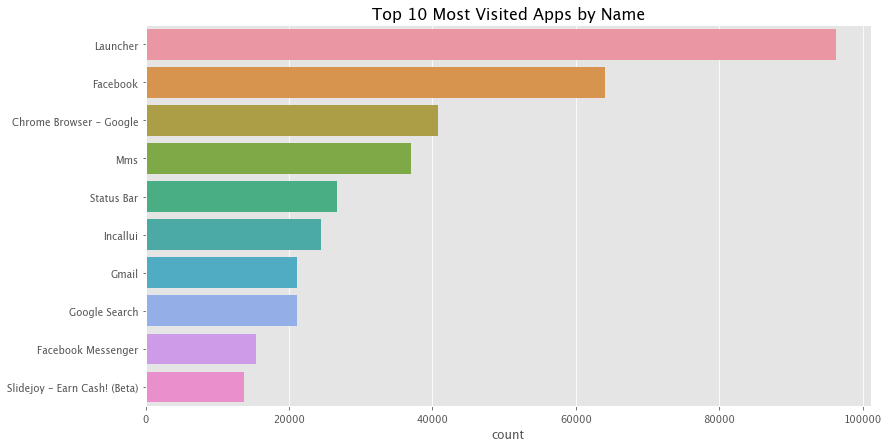

In [110]:
#ANALYSIS 6: Let's visualize the most used type of apps in a word map. 
count=list(app_data["COMMON_CATEGORY_DESC"].dropna().unique())
cloud=WordCloud(colormap="cool",width=800,height=400).generate(" ".join(count))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

filtered_apps = app_data[app_data.COMMON_CATEGORY_DESC != 'No Domain'].set_index('TOTAL_MINUTES').COMMON_CATEGORY_DESC.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_apps, order=filtered_apps.value_counts().index[:6])
plt.title("Top 6 Most Visited Apps by Type",size=16)
plt.show()

filtered_apps2 = app_data[app_data.GROUP_TITLE_DESC != 'No Domain'].set_index('TOTAL_MINUTES').GROUP_TITLE_DESC.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_apps2, order=filtered_apps2.value_counts().index[:10])
plt.title("Top 10 Most Visited Apps by Name",size=16)
plt.show()

In [111]:
#Insight: There are some conflicting findings here. However, we can conclude that Launcher, Facebook, and Google 
#google are the most frequented apps. With Misc. and Other being the most frequented type. This is consistent with 
#the original pie chart, showing that Other/Misc. (grouped together but split here)are the most used type of apps.

#Email and Socail Media remain the top app type used, evidenced by the Launcher and Facebook top 10 most visited app
#chart. 

#Note: Launcher is often ran from opening homescreen and is a system ran app on phones. Decision makers may use this
#information for seeing which social media apps are most frequented, seeing which email platforms are more popular,
#and seeing how people behave on a daily with app usage. 

#Gmail and Facebook, as expected, are the most popular email and Social Media apps. 

In [112]:
########################TV DATA ANALYSIS##############################

#READ/LOAD DATA
tv_data = pd.read_csv('/Users/ashleyansley/tv_data.csv')

##ASSUMPTIONS & DATA DESCRIPTION: 
#VideoViewPlatform-
    #OTT= streaming platform, 
    #DVR= DVR
    #VOD= VideoOnDemand
    #Live=watched on live TB
#Elapsed time- IN MILLISECONDS
#TimeShiftIndicator- 
    #Live= watched live
    #Same day= not live but same day
    #X day= # days watched later after live broadcast 
    #on demand- on demand

In [113]:
#DATA EXPLORATION 

#Display how many columns and rows.  
tv_data.shape

(65499, 30)

In [114]:
#65,499 records and 30 columns. 

In [115]:
#Display column types. 
tv_data.dtypes

USERS_META_ID                int64
VIEW_DATE_ID                 int64
VIEW_WEEK_ID                 int64
VIEW_WEEK_DESC              object
AIR_DATE                    object
AIR_TIME                    object
AIR_DOW                     object
AIR_WEEK                    object
AIR_DAY_PART_DESC           object
WEEK_DAY_END                object
VIEW_DATE                   object
VIEW_DOW                    object
PROGRAM_NAME                object
SAM_CHANNEL_NAME             int64
NETWORK_TYPE                object
EPISODE_TITLE               object
TIMESHIFT_INDICATOR_DESC    object
TIMESHIFT_INDICATOR_ID       int64
NEW_PROGRAM                 object
PREMIERE_FINALE             object
DEVICE_TYPE                 object
STREAMING_SOURCE             int64
VIDEO_VIEW_PLATFORM         object
EPISODE_NUMBER_C            object
SEASON_NUMBER_C             object
Q_PROGRAM_NAME              object
SYNDICATION_GROUP           object
MASTER_GENRE_DESC           object
SHOW_DURATION       

In [116]:
#CONVERT DATA TYPES TO CATEGORICAL
tv_data['AIR_TIME'] = tv_data['AIR_TIME'].astype("category")
tv_data['AIR_DOW'] = tv_data['AIR_DOW'].astype("category")
tv_data['AIR_WEEK'] = tv_data['AIR_WEEK'].astype("category")
tv_data['AIR_DAY_PART_DESC'] = tv_data['AIR_DAY_PART_DESC'].astype("category")
tv_data['WEEK_DAY_END'] = tv_data['WEEK_DAY_END'].astype("category")
tv_data['VIEW_DOW'] = tv_data['VIEW_DOW'].astype("category")
tv_data['PROGRAM_NAME'] = tv_data['PROGRAM_NAME'].astype("category")
tv_data['NETWORK_TYPE'] = tv_data['NETWORK_TYPE'].astype("category")
tv_data['TIMESHIFT_INDICATOR_DESC'] = tv_data['TIMESHIFT_INDICATOR_DESC'].astype("category")
tv_data['NEW_PROGRAM'] = tv_data['NEW_PROGRAM'].astype("category")
tv_data['PREMIERE_FINALE'] = tv_data['PREMIERE_FINALE'].astype("category")
tv_data['DEVICE_TYPE'] = tv_data['DEVICE_TYPE'].astype("category")
tv_data['VIDEO_VIEW_PLATFORM'] = tv_data['VIDEO_VIEW_PLATFORM'].astype("category")
tv_data['Q_PROGRAM_NAME'] = tv_data['Q_PROGRAM_NAME'].astype("category")
tv_data['SYNDICATION_GROUP'] = tv_data['SYNDICATION_GROUP'].astype("category")
tv_data['MASTER_GENRE_DESC'] = tv_data['MASTER_GENRE_DESC'].astype("category")

#CONVERTING VIEW DATE AND AIR DATE TO DATE TIME
tv_data['AIR_DATE'] = pd.to_datetime(tv_data['AIR_DATE'], errors='coerce')
tv_data['VIEW_DATE'] = pd.to_datetime(tv_data['VIEW_DATE'], errors='coerce')

#DISPLAY COLUMN TYPES AGAIN TO ENSURE UPDATED CORRECTLY
tv_data.dtypes

USERS_META_ID                        int64
VIEW_DATE_ID                         int64
VIEW_WEEK_ID                         int64
VIEW_WEEK_DESC                      object
AIR_DATE                    datetime64[ns]
AIR_TIME                          category
AIR_DOW                           category
AIR_WEEK                          category
AIR_DAY_PART_DESC                 category
WEEK_DAY_END                      category
VIEW_DATE                   datetime64[ns]
VIEW_DOW                          category
PROGRAM_NAME                      category
SAM_CHANNEL_NAME                     int64
NETWORK_TYPE                      category
EPISODE_TITLE                       object
TIMESHIFT_INDICATOR_DESC          category
TIMESHIFT_INDICATOR_ID               int64
NEW_PROGRAM                       category
PREMIERE_FINALE                   category
DEVICE_TYPE                       category
STREAMING_SOURCE                     int64
VIDEO_VIEW_PLATFORM               category
EPISODE_NUM

In [117]:
#CHECK FOR NULL VALUES
tv_data.isnull().sum()

USERS_META_ID                   0
VIEW_DATE_ID                    0
VIEW_WEEK_ID                    0
VIEW_WEEK_DESC                  0
AIR_DATE                        1
AIR_TIME                        0
AIR_DOW                         0
AIR_WEEK                        0
AIR_DAY_PART_DESC               0
WEEK_DAY_END                    0
VIEW_DATE                       0
VIEW_DOW                        0
PROGRAM_NAME                    0
SAM_CHANNEL_NAME                0
NETWORK_TYPE                  592
EPISODE_TITLE               23441
TIMESHIFT_INDICATOR_DESC        0
TIMESHIFT_INDICATOR_ID          0
NEW_PROGRAM                     0
PREMIERE_FINALE               941
DEVICE_TYPE                     0
STREAMING_SOURCE                0
VIDEO_VIEW_PLATFORM             0
EPISODE_NUMBER_C            27116
SEASON_NUMBER_C             27116
Q_PROGRAM_NAME                  0
SYNDICATION_GROUP               0
MASTER_GENRE_DESC              14
SHOW_DURATION                   0
ELAPSED_TIME  

In [118]:
#There are several null values. We will first address AIR_DATE, which has 1 null after updating DATETIME. 
#Let's remove that.
tv_data.dropna(subset=["AIR_DATE"], inplace=True)

In [119]:
#For the purposes of this analysis of tv_data, I am not interested in GROUP_TITLE COLUMN. 
#1) NOT USED FOR ANALYSIS and 2) We have PROGRAM_NAME which will suffice. 
#Will remove column.

#MASTER_GENRE  only has 14 NULLS, which is INSIGNIFICANT, so we can simply remove those nulls.
#Will remove nulls.

#NETWORK_TYPE will be used. It does have nearly 600 nulls, but that is less than <1% of the data set. 
#Will remove nulls.

#We can also see that EPISODE_TITLE, EPISODE_NUMBER, and SEASON_NUMBER all have significant amounts of null values.
#Since PROGRAM_NAME column summarizes those 3, we won't need those for analyses purposes and am not interested. 
#Will remove these 3 columns. 
    
#SAM_CHANNEL_NAME, PREMIER_FINALE and STREAMING_SOURCE also won't be used for this analyses purposes.
#Will remove column

#VIEW_WEEK_DESC is also not important as they are all the same value and VIEW_DATE is more crucial.  
#Will remove column.

In [120]:
#DROP NULLS
tv_data.dropna(subset=["MASTER_GENRE_DESC", "NETWORK_TYPE"], inplace=True)
tv_data.isnull().sum()

#DROP UNWANTED COLUMNS
tv_data.drop("EPISODE_TITLE", axis=1, inplace=True)
tv_data.drop("EPISODE_NUMBER_C", axis=1, inplace=True)
tv_data.drop("SEASON_NUMBER_C", axis=1, inplace=True)
tv_data.drop("SAM_CHANNEL_NAME",axis=1, inplace=True)
tv_data.drop("STREAMING_SOURCE", axis=1, inplace=True)
tv_data.drop("VIEW_WEEK_DESC", axis=1, inplace=True)
tv_data.dropna(subset=["PREMIERE_FINALE"], inplace=True) 

#Double check that those two columns no longer have null values
tv_data.isnull().sum()

USERS_META_ID               0
VIEW_DATE_ID                0
VIEW_WEEK_ID                0
AIR_DATE                    0
AIR_TIME                    0
AIR_DOW                     0
AIR_WEEK                    0
AIR_DAY_PART_DESC           0
WEEK_DAY_END                0
VIEW_DATE                   0
VIEW_DOW                    0
PROGRAM_NAME                0
NETWORK_TYPE                0
TIMESHIFT_INDICATOR_DESC    0
TIMESHIFT_INDICATOR_ID      0
NEW_PROGRAM                 0
PREMIERE_FINALE             0
DEVICE_TYPE                 0
VIDEO_VIEW_PLATFORM         0
Q_PROGRAM_NAME              0
SYNDICATION_GROUP           0
MASTER_GENRE_DESC           0
SHOW_DURATION               0
ELAPSED_TIME                0
dtype: int64

In [121]:
#We now have no nulls, have maintained the crucial columns needed, and can move forward. 

<AxesSubplot:ylabel='MASTER_GENRE_DESC'>

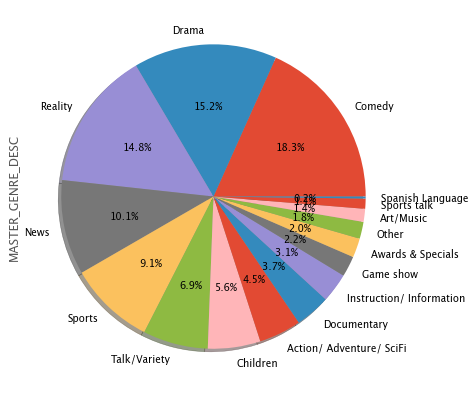

In [122]:
##ANALYSIS 1: LET'S SEE A PIE CHART OF VIEWERSHIP BY GENRE
plt.figure(figsize=(14,7))
tv_data["MASTER_GENRE_DESC"].value_counts().plot(kind="pie",shadow=True,autopct = '%1.1f%%')


In [123]:
#Insight: Comedy, Drama, and Reality are amongst the top 3 most viewed type of shows. 

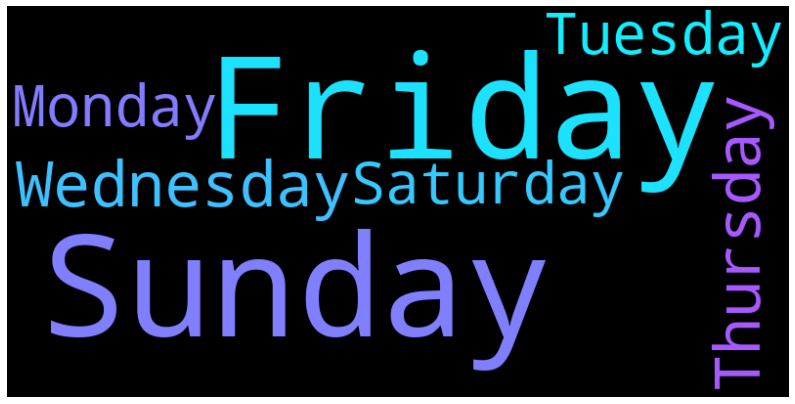

In [124]:
##ANALYSIS 2: LETS DO A WORD MAP SHOWING WHAT DAYS OF WEEK HAVE HIGHEST VIEWS.
count=list(tv_data['VIEW_DOW'].dropna().unique())
cloud=WordCloud(colormap="cool",width=800,height=400).generate(" ".join(count))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [125]:
#Insight: Appears that FRIDAY followed by SUNDAY, WEDNESDAY and THURSDAY are most frequented watched days. This 
#is important for broadcasting purposes (i.e. when is best to broadcast more popular, sponsored programs), as well 
#as for purposes of airing and releasing certain anticipated programs on streaming and cable platforms. 
#Also clearly plays into advertising, commercials and when to air certain more invested in advertisments to increase
#views/impressions.

Text(0.5, 1.0, 'Top 20 Most Streamed Programs')

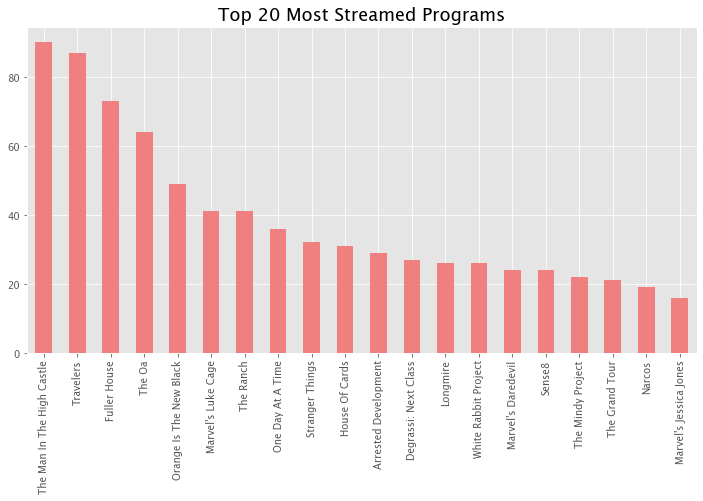

In [126]:
#ANALYSIS 3: WE CAN NOW VIEW A BAR GRAPH OF TOP 20 MOST STREAMED PROGRAMS.
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
tv_data[tv_data["NETWORK_TYPE"]=="Streaming"]["PROGRAM_NAME"].value_counts()[:20].plot(kind="bar",color="lightcoral")
plt.title("Top 20 Most Streamed Programs",size=18)

In [127]:
#Insight: #The Man In The High Castle, The OA, Orange Is The NEw Black, and Fuller House were all amongst the 
#top 4 most streamed shows. 

Text(0.5, 1.0, 'Top 5 Most Watched Type of Programs Watched Live')

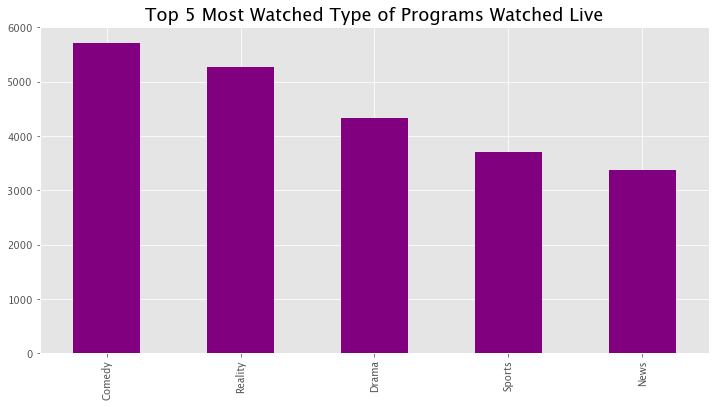

In [128]:
#ANALYSIS 4:  LET'S SEE TOP 5 GENRES WATCHED LIVE
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
tv_data[tv_data["TIMESHIFT_INDICATOR_DESC"]=="live"]["MASTER_GENRE_DESC"].value_counts()[:5].plot(kind="bar",color="purple")
plt.title("Top 5 Most Watched Type of Programs Watched Live",size=18)

In [129]:
#Insight: Comedy is the most LIVE watched type of Program, followed by Reality, Drama, then Sports. 
#This is consistent with the Pie Chart showing % by Program Type. 

#I'd like to investigate this further, specifically with the News category. It will be insteresting to see how 
#people are watching the news, if not LIVE. 

Text(0.5, 1.0, 'Top 3 Ways Viewers Watch News')

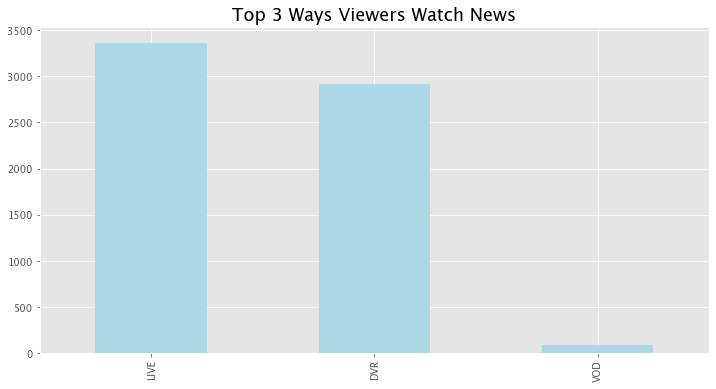

In [130]:
#ANALYSIS 5: LET'S SEE HOW VIEWERS ARE WATCHING NEWS MOST.
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
tv_data[tv_data["MASTER_GENRE_DESC"]=="News"]["VIDEO_VIEW_PLATFORM"].value_counts()[:3].plot(kind="bar",color="lightblue")
plt.title("Top 3 Ways Viewers Watch News",size=18)

In [131]:
#Insight: Appears that most people do watch News LIVE, followed by DVR (likely on same day). 

#Perhaps people access news in other ways such as phone apps, given that news was in the bottom of the top 5 most 
#wathced live programs and most wathced programs overall. 

#This is also interesting to see how Social Media has shifted the way viewers receive news. Much news is absorbed
#on other platforms such as social media, web, phone apps., etc.

#Further News analysis below.

In [132]:
#ANALYSIS 6: TOP 10 NEWS PROGRAMS WATCHED LIVE 
tv_data[(tv_data["VIDEO_VIEW_PLATFORM"]=="LIVE") & (tv_data["MASTER_GENRE_DESC"]=='News')]["PROGRAM_NAME"].sample(10)

37647                       Fox 4 News At 6
40666                           Fox 32 News
44917               Ktvu Fox 2 News At Noon
12343                Fox 10 Arizona Morning
16862                   Action News 6:00 Am
48461               Action News At 12:30 Pm
37715     Nbc Nightly News With Lester Holt
30849     Nbc Nightly News With Lester Holt
24428    Cbs Evening News With Scott Pelley
46550                                   Tmz
Name: PROGRAM_NAME, dtype: category
Categories (5056, object): [''Twas The Season: The 2016 Cubs Year In Review', '007 - Operação Skyfall', '00S Videos', '1,000 Ways To Die', ..., 'Zou', 'Zuhause Im Glck - Unser Einzug In Ein Neues L..., 'Zwischen Tll Und Trnen', 'Äventyr I Tid Och Rum, Kör!']

In [133]:
#Insight: These are the most viewed News Programs watched LIVE. 

#Shows which shows are more anticipated. Appears that the 6am NEws, 11am News, CNN Newsroom, Hannity Special, and
#Tucker Carlson Tonight show were most viewed LIVE. 

Text(0.5, 1.0, 'Frequency of Most Watched Type of Programs Watched Same Day')

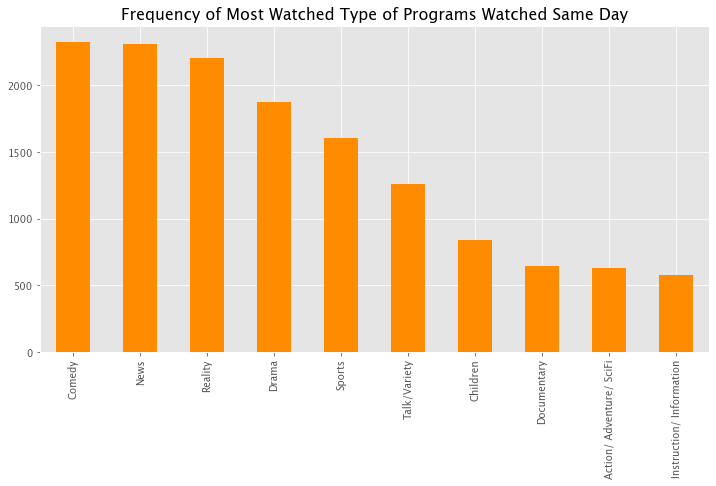

In [134]:
#ANALYSIS 7: Let's check Frequency of programs watched on the same day. 
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
tv_data[tv_data["TIMESHIFT_INDICATOR_DESC"]=="same day"]["MASTER_GENRE_DESC"].value_counts()[:10].plot(kind="bar",color="darkorange")
plt.title("Frequency of Most Watched Type of Programs Watched Same Day",size=16)

In [135]:
#Insight: Comedy, News and Reality are among the top 3 types of Programs watched on the same day as air date.

#This is consistent with original pie chart displaying most watched type of programs in general.

#This just further provides insight on types of anticipated programs viewed, rather is be cable, broadcast, or 
#streaming. 

#Another interesting point, having previously done analysis on News viewership, note that News is typically 
#watched on the same day. We may can conclude that people value News, or that News programs don't re-air as often
#as other types of Programs such as Sports, Drama, Reality, etc. 

In [136]:
#ANALYSIS 8: DOES SHOW DURATION CAUSE AFFECT ON HOW LONG A PERSON WATCHES?

#Explore average air time and average time watched. 
tv_data.describe()

,USERS_META_ID,VIEW_DATE_ID,VIEW_WEEK_ID,TIMESHIFT_INDICATOR_ID,SHOW_DURATION,ELAPSED_TIME
count,6.395100e+04,6.395100e+04,63951.0,63951.000000,6.395100e+04,6.395100e+04
mean,1.945792e+06,2.017011e+07,201701.0,13.124408,4.041561e+06,9.870300e+05
std,7.239595e+05,2.009449e+00,0.0,30.849922,2.913899e+06,1.351243e+06
min,4.310000e+02,2.017010e+07,201701.0,1.000000,1.200000e+05,1.014000e+03
25%,1.899541e+06,2.017010e+07,201701.0,1.000000,1.800000e+06,1.696030e+05
50%,2.330818e+06,2.017010e+07,201701.0,1.000000,3.600000e+06,4.220110e+05
75%,2.363239e+06,2.017011e+07,201701.0,2.000000,3.600000e+06,1.339118e+06
max,2.373764e+06,2.017011e+07,201701.0,99.000000,2.880000e+07,3.433746e+07


In [137]:
#Insight: Looks like the average person wathces a program for 16.5 minutes. While the average program duration is 
#around 67 mintues. 

#This is important to see which types of programs keep viewers attention more. 

#Let's check correlation between time watched and show duration.

<AxesSubplot:>

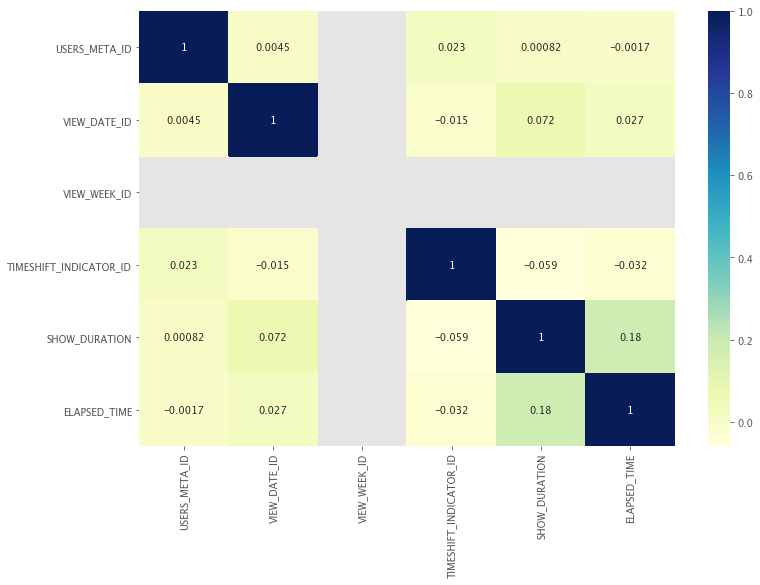

In [138]:
tv_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(tv_data.corr(), annot=True, cmap="YlGnBu")

In [139]:
#Insight: As expected, the two are not correlated, thus I do not suspect that it's Program Run Time that's affecting
#the time a person watches a program.

#We can see if Genre has more of an impact on time watched. 

Text(0.5, 1.0, 'Top 10 Genres Watched More than 5 Minutes')

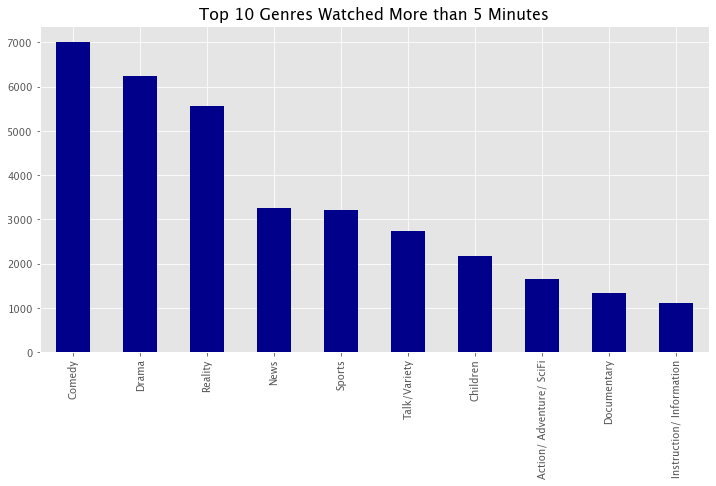

In [140]:
#ANALYSIS 9: DOES GENRE TYPE AFFECT HOW LONG A PERSON IS ENGAGED?

#Plot the most popular Genres watched more than 5 minutes. 
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
tv_data[tv_data["ELAPSED_TIME"]>=300000]["MASTER_GENRE_DESC"].value_counts()[:10].plot(kind="bar",color="darkblue")
plt.title("Top 10 Genres Watched More than 5 Minutes",size=16)

In [141]:
#Insight: Genre Type does seem to affect the Time a program is viewed. We can see this by the drop off after the 
#3rd most popular genre, Reality. This is also consistent with the original pie chart displaying the most watched
#types of Programs. People are obviously more engaged in Comedy, Drama, and Reality. 

#Also, people seem to watch Information and Documentaries the shortest.  

<AxesSubplot:ylabel='NETWORK_TYPE'>

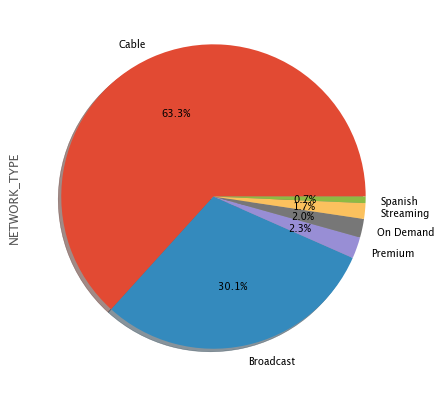

In [142]:
#ANALYSIS 10: DO PEOPLE STREAM MORE VERSUS OTHER METHODS SUCH AS CABLE, ETC.?

#Plot pie chart of most used platform.
plt.figure(figsize=(14,7))
tv_data["NETWORK_TYPE"].value_counts().plot(kind="pie",shadow=True,autopct = '%1.1f%%')

In [143]:
#Insight: Taking into account that this data is dated, this may be an explanation for low streaming numbers. 
#This shows that cable is still popular in comparison to uptick in streaming apps. This also goes for broadcasting.
#Ages may be a factor as well. I would get age data and make further content decisions. For an example, 
#streaming may be more attractive to a younger age group, whereas cable to another. 

In [144]:
##########################WEB DATA ANALYSIS########################

#READ/LOAD DATA
web_data = pd.read_csv('/Users/ashleyansley/web_data.csv')

In [145]:
#DATA EXPLORATION

#View Data types by column.
web_data.dtypes

TIME_DIM_ID                int64
DEVICE_DIM_ID              int64
USERS_META_ID              int64
HOUR_PART_DIM_ID           int64
HOUR_PART_DESC            object
PRIMARY_DOMAIN_DIM_ID      int64
PRIMARY_DOMAIN_DESC       object
TOTAL_MINUTES            float64
dtype: object

In [146]:
#CONVERT DATA TYPES TO CATEGORICAL
web_data['HOUR_PART_DESC'] = web_data['HOUR_PART_DESC'].astype("category")
web_data['PRIMARY_DOMAIN_DESC'] = web_data['PRIMARY_DOMAIN_DESC'].astype("category")
web_data.dtypes

TIME_DIM_ID                 int64
DEVICE_DIM_ID               int64
USERS_META_ID               int64
HOUR_PART_DIM_ID            int64
HOUR_PART_DESC           category
PRIMARY_DOMAIN_DIM_ID       int64
PRIMARY_DOMAIN_DESC      category
TOTAL_MINUTES             float64
dtype: object

In [147]:
#Check for NULL values. 
web_data.isnull().sum()

TIME_DIM_ID              0
DEVICE_DIM_ID            0
USERS_META_ID            0
HOUR_PART_DIM_ID         0
HOUR_PART_DESC           0
PRIMARY_DOMAIN_DIM_ID    0
PRIMARY_DOMAIN_DESC      0
TOTAL_MINUTES            0
dtype: int64

In [148]:
#No null values. Good to move forward. 

In [149]:
#Get description of data: 
print(web_data)
web_data.describe()

       TIME_DIM_ID  DEVICE_DIM_ID  USERS_META_ID  HOUR_PART_DIM_ID  \
0         20170102         162086          80921                 4   
1         20170102         283717         673473                19   
2         20170102         169101         672706                41   
3         20170102         333933        1753266                32   
4         20170102         256991        2306139                31   
...            ...            ...            ...               ...   
33516     20170102         287801        2253008                42   
33517     20170102         281182        2332116                33   
33518     20170102         292658        2089081                28   
33519     20170102         286466        2022477                24   
33520     20170102         291609        1566039                21   

           HOUR_PART_DESC  PRIMARY_DOMAIN_DIM_ID PRIMARY_DOMAIN_DESC  \
0      01:30 AM -02:00 AM                 129419               Fedex   
1      09:00 AM

,TIME_DIM_ID,DEVICE_DIM_ID,USERS_META_ID,HOUR_PART_DIM_ID,PRIMARY_DOMAIN_DIM_ID,TOTAL_MINUTES
count,33521.0,33521.000000,3.352100e+04,33521.000000,3.352100e+04,33521.000000
mean,20170102.0,278848.295367,1.913779e+06,28.398228,5.263223e+05,2.439129
std,0.0,53155.435546,6.974090e+05,12.763094,8.124354e+05,3.498337
min,20170102.0,14006.000000,4.310000e+02,1.000000,3.100000e+01,0.000000
25%,20170102.0,255089.000000,1.719974e+06,21.000000,5.008800e+04,0.230000
50%,20170102.0,296109.000000,2.290793e+06,30.000000,1.493150e+05,0.780000
75%,20170102.0,321748.000000,2.345300e+06,39.000000,8.624270e+05,2.940000
max,20170102.0,339026.000000,2.373712e+06,48.000000,3.045518e+06,30.000000


In [150]:
#Insight: Appears that people are surfing a site on the web for an avg. of 2.4 minutes. 

Text(0.5, 1.0, 'Frequency of Times Web is Surfed')

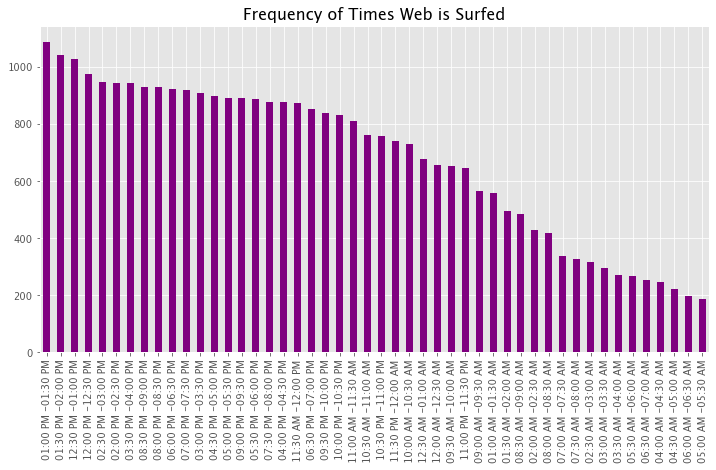

In [151]:
#ANALYSIS 1:WHEN IS WEB ENGAGEMENT HIGHEST?

#Plot times 
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
web_data[web_data["TOTAL_MINUTES"]>.01]["HOUR_PART_DESC"].value_counts()[:48].plot(kind="bar",color="purple")
plt.title("Frequency of Times Web is Surfed" ,size=16)

In [152]:
#Insight: People mostly surf the web from 12pm-3pm, followed by evening times. 

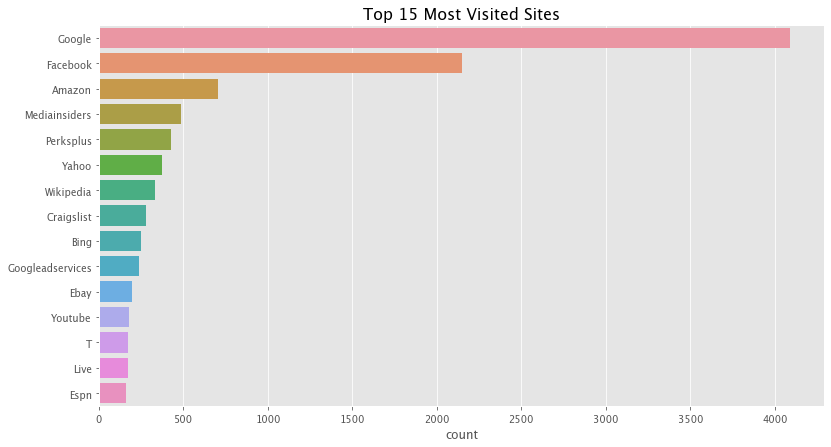

In [153]:
#ANALYSIS 2: Which domain types have most engagement?
filtered_domains = web_data[web_data.PRIMARY_DOMAIN_DESC != 'No Domain'].set_index('TOTAL_MINUTES').PRIMARY_DOMAIN_DESC.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_domains, order=filtered_domains.value_counts().index[:15])
plt.title("Top 15 Most Visited Sites",size=16)
plt.show()

In [154]:
#Inisight: The above chart gives us a breakdown of which web sites are used the most frequently for the longest 
#amount of time. We can see that Google is the most popular, followed by Facebook and Amazon. 

#This is useful for analytics and tracking, as well as digital marketing and advertising. Let's see which times
#have the most engagement. 

Text(0.5, 1.0, 'Times with Highest Engagement')

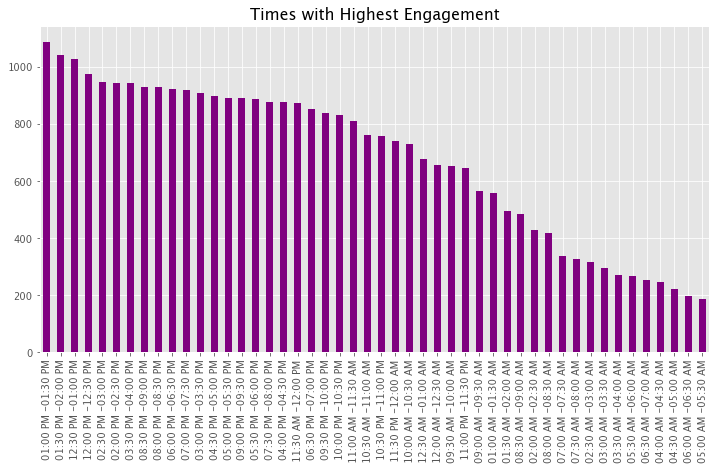

In [155]:
#ANALYSIS 3: WHICH TIMES HAVE MOST ENGAGEMENT? 

plt.style.use("ggplot")
plt.figure(figsize=(12,6))
web_data[web_data["TOTAL_MINUTES"]>.01]["HOUR_PART_DESC"].value_counts()[:48].plot(kind="bar",color="purple")
plt.title("Times with Highest Engagement" ,size=16)